# Biometrical Data Classification with KNN

## Introduction

This Jupyter notebook is dedicated to the construction and assessment of a K-Nearest Neighbors (KNN) classifier tailored for biometrical data analysis. The process commences with the ingestion and preprocessing of data, sourced from 'data/X_train.csv' and 'data/y_train.csv', followed by splitting it into training and test subsets while ensuring stratification as per the y_train labels, with a test size allocation of 0.1. Subsequent steps involve the initialization of the KNN classifier leveraging scikit-learn's offerings, tuned with suitable parameters, and the training phase where the model is fitted using the prepared training data. The final segment focuses on the model's evaluation, employing the test data to generate a comprehensive classification report alongside a confusion matrix, thereby facilitating a detailed examination of the model's performance metrics such as accuracy, precision, recall, and F1-score.

## Creating the KNN Model

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
X_train, y_train = pd.read_csv('data/X_train.csv'), pd.read_csv('data/y_train.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    test_size=0.1,
    random_state=42,
    shuffle=True,
    stratify=y_train
)

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=10)

## Evaluating the Model

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
y_pred = knn.predict(X_test)

In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           N       0.18      0.06      0.10        31
           S       0.70      0.88      0.78        76

    accuracy                           0.64       107
   macro avg       0.44      0.47      0.44       107
weighted avg       0.55      0.64      0.58       107



In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)

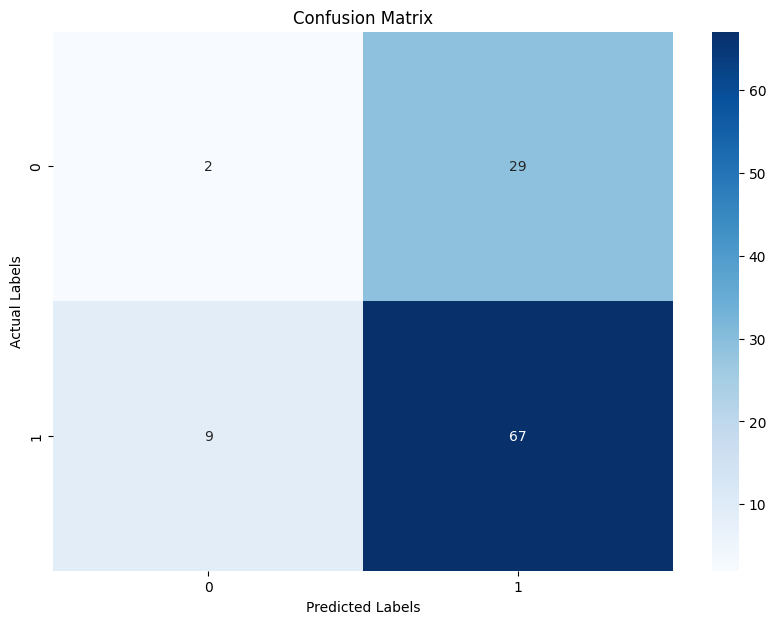

In [31]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()